<a href="https://colab.research.google.com/github/albertoBetancourt/data_science/blob/master/Proyecto_Python_para_ciencia_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/CienciaDeDatos/Online_Retail.csv'

df = pd.read_csv(path, encoding='ISO-8859-1')

###Etapa de exploración

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [42]:
df.head() #Para imprimir solo las primeras 5 filas

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [43]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [44]:
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [45]:
df.duplicated().sum()

5268

In [46]:
unique_values = {col: df[col].unique() for col in df.columns}

for col, values in unique_values.items():
    print(f"Columna '{col}':")
    print(f"Número de valores únicos: {len(values)}")
    print(f"Valores únicos: {values[:6]}")
    print('-' * 50)

Columna 'InvoiceNo':
Número de valores únicos: 25900
Valores únicos: ['536365' '536366' '536367' '536368' '536369' '536370']
--------------------------------------------------
Columna 'StockCode':
Número de valores únicos: 4070
Valores únicos: ['85123A' '71053' '84406B' '84029G' '84029E' '22752']
--------------------------------------------------
Columna 'Description':
Número de valores únicos: 4224
Valores únicos: ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES']
--------------------------------------------------
Columna 'Quantity':
Número de valores únicos: 722
Valores únicos: [ 6  8  2 32  3  4]
--------------------------------------------------
Columna 'InvoiceDate':
Número de valores únicos: 23260
Valores únicos: ['12/1/10 8:26' '12/1/10 8:28' '12/1/10 8:34' '12/1/10 8:35'
 '12/1/10 8:45' '12/1/10 9:00']
-------------------------------

###Limpieza

In [47]:
data_cleaned = df.drop_duplicates()

data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [48]:
data_cleaned.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [49]:
data_cleaned.duplicated().sum()

0

### Creacion de columnas

In [50]:
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [51]:
data_cleaned['TotalAmount'] = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom,20.34


In [52]:
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

<ipython-input-52-8a8526100fe8>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [53]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [54]:
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


### Analisis

In [55]:
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

,TotalAmount
Year,
2010,552372.860
2011,7726146.564


In [56]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 6 else 2)

In [57]:
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

### Visualizacion de datos

In [58]:
total_returns = data_cleaned[data_cleaned['Quantity'] < 0].shape[0]
total_returns

8872

In [59]:
total_non_returns = data_cleaned[data_cleaned['Quantity'] >= 0].shape[0]
total_non_returns

392732

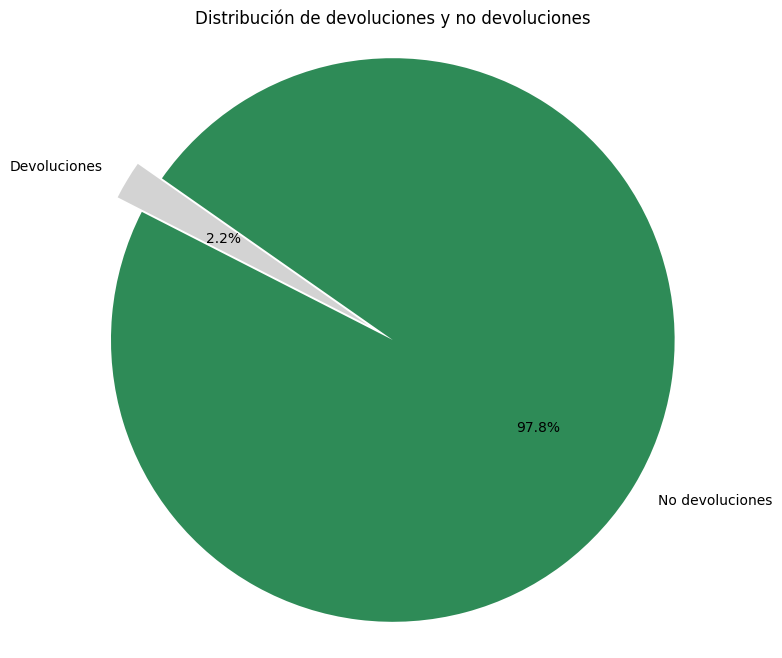

In [60]:
import matplotlib.pyplot as plt

labels = ['Devoluciones', 'No devoluciones']
sizes = [total_returns, total_non_returns]
colors = ['LightGray', 'SeaGreen']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=145, explode=(0.1, 0))
plt.axis('equal')

plt.title('Distribución de devoluciones y no devoluciones')
plt.show()

In [61]:
# crear una columna categórica basada en el monto total de la transacción (ejemplo: 'Low','Medium','High')
def categorize_amount(amount):
    if amount < 30:
        return 'Low'
    elif 30 <= amount < 90:
        return 'Medium'
    else:
        return 'High'

data_cleaned['TransactionCategory'] = data_cleaned['TotalAmount'].apply(categorize_amount)
data_cleaned.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,TransactionCategory
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,Low
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,Low
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,Low


TransactionCategory
Low       347645
Medium     40702
High       13257
Name: count, dtype: int64


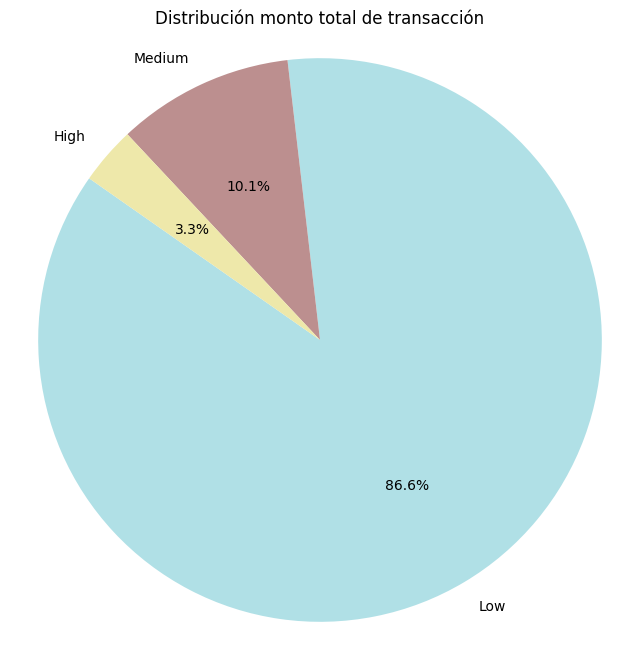

In [62]:
import matplotlib.pyplot as plt

labels = ['Low', 'Medium', 'High']
sizes = data_cleaned['TransactionCategory'].value_counts()
print(sizes)

colors = ['PowderBlue', 'RosyBrown', 'PaleGoldenRod']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=145)
plt.axis('equal')

plt.title('Distribución monto total de transacción')
plt.show()

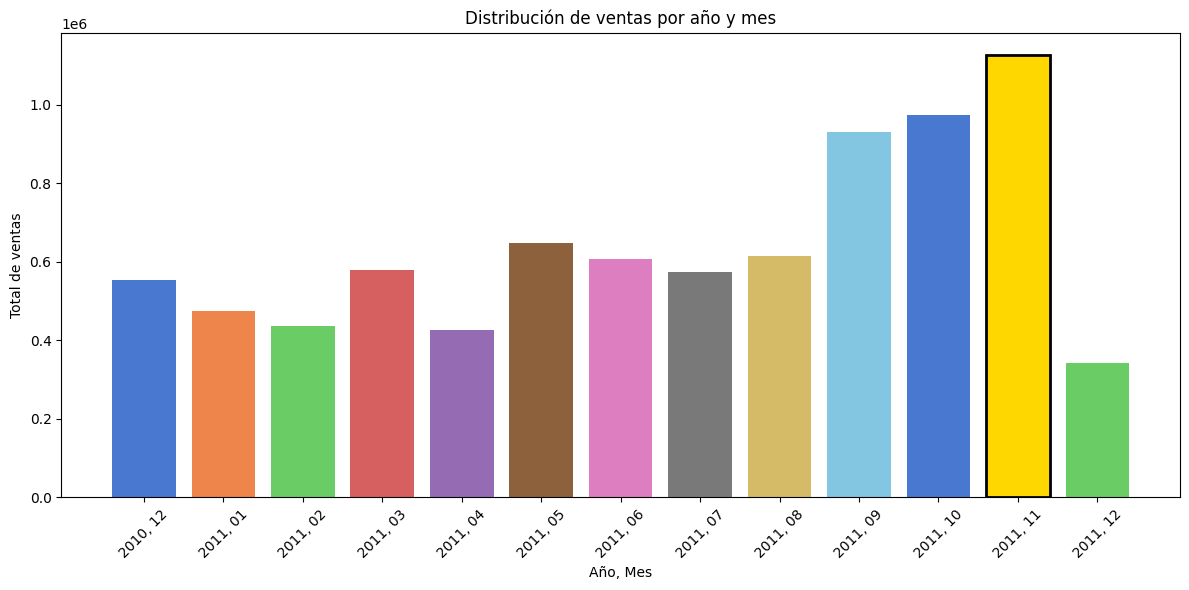

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Agrupación y cálculo del total por año y mes
grouped_data = data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum()

# Preparar etiquetas y colores
x_labels = [f'{year}, {month:02d}' for year, month in grouped_data.index]
colors = ['gold' if idx == grouped_data.idxmax() else c for idx, c in zip(grouped_data.index, sns.color_palette('muted', len(grouped_data)))]

# Crear gráfico
plt.figure(figsize=(12, 6))
bars = plt.bar(x_labels, grouped_data, color=colors)

# Resaltar borde del máximo
max_bar = max(bars, key=lambda b: b.get_height())
max_bar.set_edgecolor('black')
max_bar.set_linewidth(2)

plt.title('Distribución de ventas por año y mes')
plt.xlabel('Año, Mes')
plt.ylabel('Total de ventas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [65]:
top_products = data_cleaned.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products = top_products.reset_index()
top_products = pd.merge(top_products, data_cleaned[['StockCode', 'Description']].drop_duplicates(),
                        on='StockCode', how='left')

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0.0, 0, '0'),
  Text(10000.0, 0, '10000'),
  Text(20000.0, 0, '20000'),
  Text(30000.0, 0, '30000'),
  Text(40000.0, 0, '40000'),
  Text(50000.0, 0, '50000'),
  Text(60000.0, 0, '60000')])

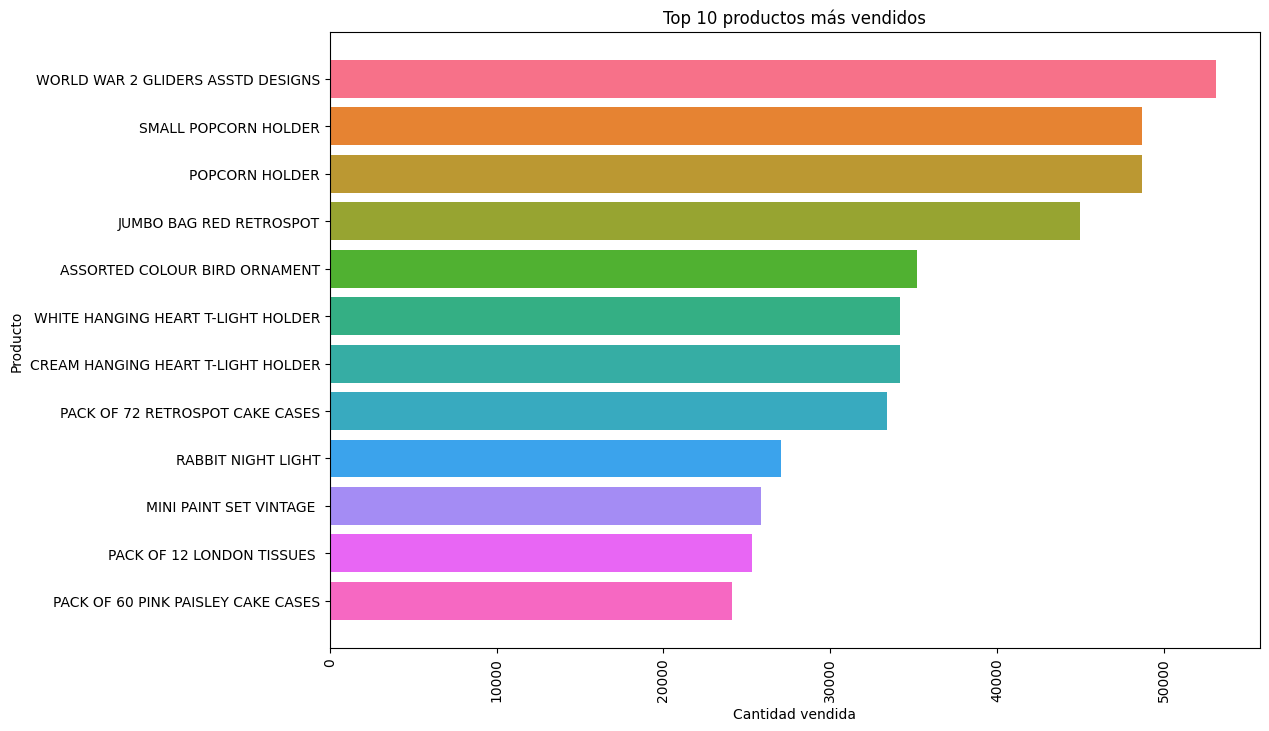

In [70]:
plt.figure(figsize=(12, 8))
colors = sns.color_palette('husl', len(top_products))

plt.barh(top_products['Description'], top_products['Quantity'], color=colors)
plt.xlabel('Cantidad vendida')
plt.ylabel('Producto')
plt.title('Top 10 productos más vendidos')
plt.gca().invert_yaxis()
plt.xticks(rotation=90)